In [37]:
#Provide import statements for numpy, matplotlib.pyplot, pandas as pd, and curve_fit from scipy

In [3]:
#0. Source ID: the IAU designation for the SPT-detected source.
#1. RA: right ascension (J2000) in degrees.
#2. DEC: declination (J2000) in degrees.
#3. S/N (2.0 mm): detection significance (signal-to-noise ratio) in the 2.0 mm band.
#4. Sraw (2.0 mm): raw flux (uncorrected for flux boosting) in the 2.0 mm band.
#5. Sbest (2.0 mm): median value of de-boosted flux at 2.0 mm.
#6. dSup (2.0 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#7. dSdown (2.0 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#8. S/N (1.4 mm): detection significance (signal-to-noise ratio) in the 1.4 mm band.
#9. Sraw (1.4 mm): raw flux (uncorrected for flux boosting) in the 1.4 mm band.
#10. Sbest (1.4 mm): median value of de-boosted flux at 1.4 mm.
#11. dSup (1.4 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#12. dSdown (1.4 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#13. alpharaw: estimate (from the raw flux in each band) of the 2.0 mm-1.4 mm spectral index alpha
#14. alphabest: median value of spectral index.
#15. d_alphaup: upper error bar (1-sigma normal equivalent) of spectral index.
#16. d_alphadown (2.0 mm): lower error bar (1-sigma normal equivalent) of spectral index.
#17. P(alpha > 1.66): fraction of the spectral index posterior probability distribution above the threshold value of 1.66. A higher value of P means the source is more likely to be dust-dominated.
#18. Type: source classification (synchrotron- or dust-dominated).
#19. Nearest SUMSS source: angular distance (in arseconds) from the nearest source in the 36 cm (843 MHz) Sydney University Molongolo Sky Survey.
#20. Nearest RASS source: angular distance (in arseconds) from the nearest source in the ROSAT All-Sky Survey (RASS) Bright Source Catalog or Faint Source Catalog.
#21. Nearest IRAS source: angular distance (in arseconds) from the nearest source in the IRAS Faint-Source Catalog.


In [55]:
with open('source_table_vieira09_3sigma.dat','r') as f:
    df = pd.DataFrame(l.rstrip().split()[1:] for l in f)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df_rem = df

In [56]:
# Use for loops and if statements to remove rows with:
# S/N(2.0mm) < 4.5 and S/N(1.4mm) < 4.5

for index, row in df_rem.iterrows():
    if float(row[3]) < 4.5 and float(row[8]) < 4.5:
        df_rem = df_rem.drop([index])

# All sources that made the flux cut
df_rem_all = df_rem

In [67]:
# Use for loops and if statements to remove rows with:
# SUMSS, RASS, IRAS, source within 60 arcseconds
for index, row in df_rem.iterrows():
    if float(row[19]) < 60 or float(row[20]) < 60 or float(row[21]) < 60:
        df_rem = df_rem.drop([index])

In [69]:
#Flux Cuts
sig_2 = 1.3
sig_1_4 = 3.4
df_rem

,SPTID,RA,DEC,S/N(2.0mm),S_raw_(2.0mm)_[mJy],S_best(2.0mm)[mJy],dS_up(2.0mm)[mJy],dS_down(2.0mm)[mJy],S/N(1.4mm),S_raw_(1.4mm)_[mJy],...,dS_down(1.4mm)[mJy],alpha_raw,alpha_best,d_alpha_up,d_alpha_down,P(alpha>1),Type,dR_SUMSS[arcsec],dR_RASS[arcsec],dR_IRAS[arcsec]
324,J050508-5346.4,76.284,-53.775,4.76,5.98,4.56,1.63,3.38,1.49,4.98,...,1.95,-0.5,-0.2,2.0,1.8,0.15,sync,120,744,605
328,J050511-5346.0,76.297,-53.767,2.06,2.59,2.72,1.08,1.42,5.39,18.05,...,9.20,5.3,3.6,1.0,3.5,0.74,dust,82,766,568
341,J050523-5808.5,76.346,-58.143,4.56,5.52,1.44,3.44,1.19,0.22,0.72,...,1.26,-5.6,-0.6,2.9,1.7,0.21,sync,302,795,408
347,J050528-5056.6,76.369,-50.944,1.71,2.24,1.63,1.45,1.17,4.87,16.84,...,1.29,5.5,1.9,2.3,3.2,0.52,dust,253,464,216
533,J050831-5449.4,77.132,-54.823,0.84,1.06,0.72,1.08,0.50,4.66,15.58,...,0.67,7.3,1.9,2.3,2.8,0.52,dust,391,540,770
570,J050907-5339.2,77.283,-53.653,3.27,4.11,3.48,1.30,1.33,4.61,15.42,...,3.24,3.6,1.3,2.4,3.2,0.46,sync,268,205,314
655,J051040-5558.3,77.670,-55.972,2.04,2.56,1.77,1.35,1.21,4.59,15.36,...,1.15,4.9,1.2,2.7,2.8,0.45,sync,145,1014,1357
680,J051116-5341.9,77.819,-53.700,5.23,6.57,5.91,1.33,1.36,5.16,17.27,...,3.79,2.6,2.8,0.9,0.9,0.89,dust,203,1025,287
771,J051259-5935.6,78.247,-59.594,4.69,5.68,5.54,1.20,1.02,7.72,24.71,...,3.99,4.0,3.9,0.6,0.7,1.00,dust,204,540,162
831,J051404-5555.2,78.521,-55.920,0.92,1.16,0.72,1.05,0.48,4.51,15.07,...,0.65,7.0,1.7,2.3,2.8,0.51,dust,282,546,1119


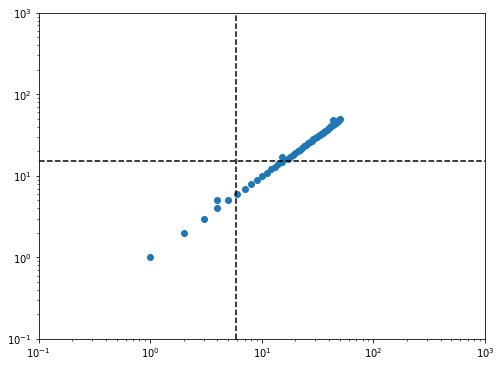

In [70]:
#Use scatter plots to plot the 1.4 mm flux versus the 2.0 mm flux for all sources above flux cut

fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(df_rem['S_raw_(2.0mm)_[mJy]'], df_rem['S_raw_(1.4mm)_[mJy]'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(.1,1000)
plt.ylim(.1,1000)
ax.axvline(4.5*sig_2, ls = '--', c = 'k', label =r'Flux Cut (4.5$\sigma$)')
ax.axhline(4.5*sig_1_4, ls = '--', c = 'k')
